In [17]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from pathlib import Path
from tabulate import tabulate
from matplotlib import pyplot as plt
import os
import re
import matplotlib.patches as mpatches
import math
import sys
import random
import time
from scipy import stats

In [18]:
cvc5_csv = 'cvc5_423.csv'
osmt_csv = 'osmt_423.csv'

cvc5_df = pd.read_csv(cvc5_csv)
osmt_df = pd.read_csv(osmt_csv)

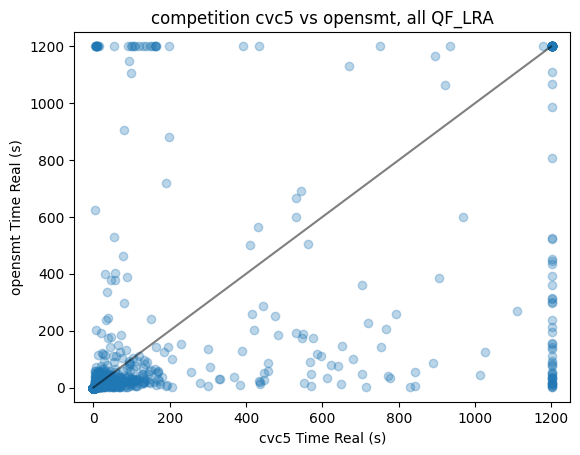

In [20]:
plt.plot(list(range(0,1200)), color="black", alpha=0.5)
plt.scatter(cvc5_df["time_real"], osmt_df["time_real"], alpha=0.3)
plt.xlabel('cvc5 Time Real (s)')
plt.ylabel('opensmt Time Real (s)')
plt.xlim(-50,1250)
plt.ylim(-50,1250)
plt.title("competition cvc5 vs opensmt, all QF_LRA")
plt.savefig("scatter.png")
plt.show()


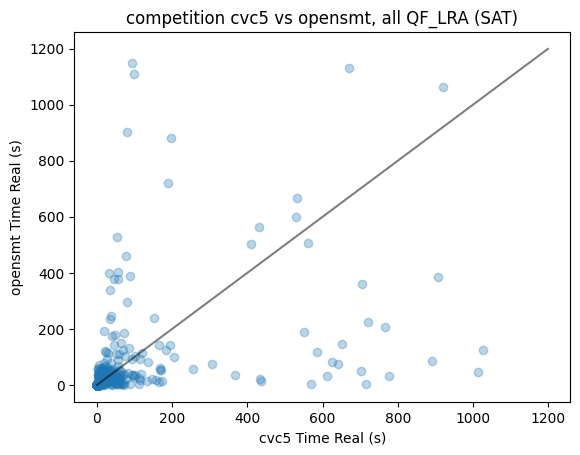

In [21]:
plt.clf() 

cvc5_sat = cvc5_df[cvc5_df['result'] == 'sat']
osmt_sat = osmt_df[osmt_df['result'] == 'sat']

merged_df = pd.merge(cvc5_sat, osmt_sat, on='benchmark', suffixes=('_cvc5', '_osmt'))

plt.plot(list(range(0,1200)), color="black", alpha=0.5)
plt.scatter(merged_df['time_real_cvc5'], merged_df['time_real_osmt'], alpha=0.3)
plt.title("competition cvc5 vs opensmt, all QF_LRA (SAT)")
plt.xlabel('cvc5 Time Real (s)')
plt.ylabel('opensmt Time Real (s)')
plt.savefig("scatter_sat.png")
plt.show()


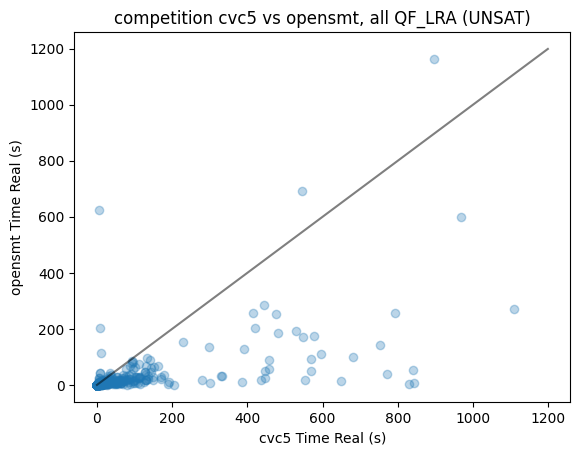

In [22]:
plt.clf() 

cvc5_unsat = cvc5_df[cvc5_df['result'] == 'unsat']
osmt_unsat = osmt_df[osmt_df['result'] == 'unsat']

merged_df = pd.merge(cvc5_unsat, osmt_unsat, on='benchmark', suffixes=('_cvc5', '_osmt'))

plt.plot(list(range(0,1200)), color="black", alpha=0.5)
plt.scatter(merged_df['time_real_cvc5'], merged_df['time_real_osmt'], alpha=0.3)
plt.title("competition cvc5 vs opensmt, all QF_LRA (UNSAT)")
plt.xlabel('cvc5 Time Real (s)')
plt.ylabel('opensmt Time Real (s)')
plt.savefig("scatter_unsat.png")
plt.show()

Number of problems solved cvc5: 1678
Number of problems solved osmt: 1689


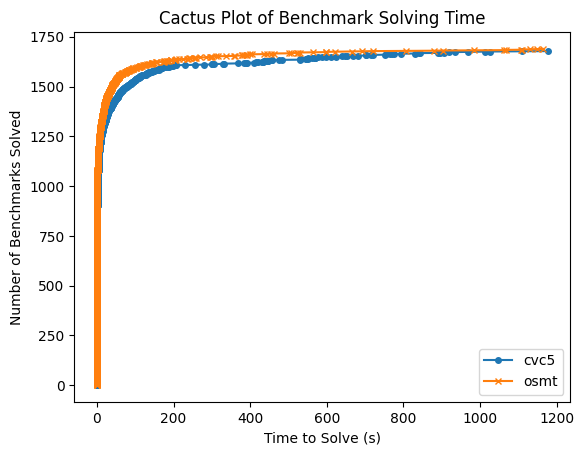

In [23]:

plt.clf()

cvc5_solved = cvc5_df[cvc5_df['result'].isin(['sat', 'unsat'])]
osmt_solved = osmt_df[osmt_df['result'].isin(['sat', 'unsat'])]

num_solved_cvc5 = len(cvc5_solved)
num_solved_osmt = len(osmt_solved)

print(f"Number of problems solved cvc5: {num_solved_cvc5}")
print(f"Number of problems solved osmt: {num_solved_osmt}")

cvc5_solved_sorted = cvc5_solved.sort_values(by='time_real')
osmt_solved_sorted = osmt_solved.sort_values(by='time_real')

cvc5_solved_sorted['cumulative_solved'] = range(1, len(cvc5_solved_sorted) + 1)
osmt_solved_sorted['cumulative_solved'] = range(1, len(osmt_solved_sorted) + 1)

plt.plot(cvc5_solved_sorted['time_real'], cvc5_solved_sorted['cumulative_solved'], label='cvc5', marker='o', linestyle='-', markersize=4)
plt.plot(osmt_solved_sorted['time_real'], osmt_solved_sorted['cumulative_solved'], label='osmt', marker='x', linestyle='-', markersize=4)

plt.title('Cactus Plot of Benchmark Solving Time')
plt.xlabel('Time to Solve (s)')
plt.ylabel('Number of Benchmarks Solved')
plt.legend()
plt.savefig("cactus.png")
plt.show()



In [24]:
cvc5_solved = cvc5_df[cvc5_df['result'].isin(['sat', 'unsat'])]["time_real"]
osmt_solved = osmt_df[osmt_df['result'].isin(['sat', 'unsat'])]["time_real"]

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(cvc5_solved, osmt_solved, alternative='two-sided')

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the performance of the two solvers.")
else:
    print("There is no statistically significant difference between the performance of the two solvers.")


U-statistic: 1629992.0
P-value: 1.3095712436856578e-14
There is a statistically significant difference between the performance of the two solvers.


Number of problems solved cvc5: 353
Number of problems solved osmt: 367


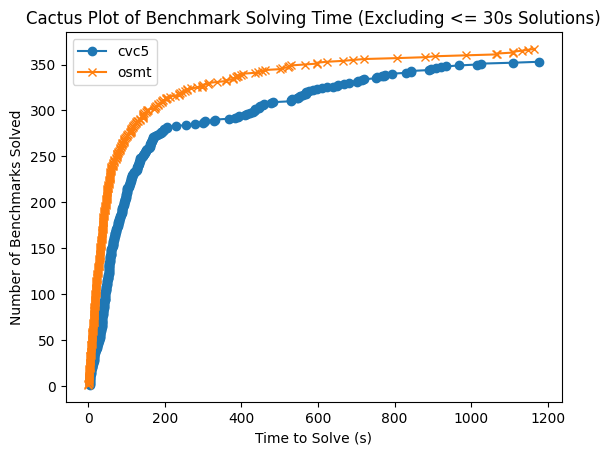

In [16]:
plt.clf()

cvc5_solved = cvc5_df[cvc5_df['result'].isin(['sat', 'unsat'])]
osmt_solved = osmt_df[osmt_df['result'].isin(['sat', 'unsat'])]

benchmarks_over_30 = pd.concat([cvc5_solved, osmt_solved])
benchmarks_over_30 = benchmarks_over_30[benchmarks_over_30['time_real'] > 30]['benchmark'].unique()

cvc5_solved = cvc5_solved[cvc5_solved['benchmark'].isin(benchmarks_over_30)]
osmt_solved = osmt_solved[osmt_solved['benchmark'].isin(benchmarks_over_30)]

num_solved_cvc5 = len(cvc5_solved)
num_solved_osmt = len(osmt_solved)

print(f"Number of problems solved cvc5: {num_solved_cvc5}")
print(f"Number of problems solved osmt: {num_solved_osmt}")

cvc5_solved_sorted = cvc5_solved.sort_values(by='time_real')
osmt_solved_sorted = osmt_solved.sort_values(by='time_real')

cvc5_solved_sorted['cumulative_solved'] = range(1, len(cvc5_solved_sorted) + 1)
osmt_solved_sorted['cumulative_solved'] = range(1, len(osmt_solved_sorted) + 1)

plt.plot(cvc5_solved_sorted['time_real'], cvc5_solved_sorted['cumulative_solved'], label='cvc5', marker='o', linestyle='-')
plt.plot(osmt_solved_sorted['time_real'], osmt_solved_sorted['cumulative_solved'], label='osmt', marker='x', linestyle='-')

plt.title('Cactus Plot of Benchmark Solving Time (Excluding <= 30s Solutions)')
plt.xlabel('Time to Solve (s)')
plt.ylabel('Number of Benchmarks Solved')
plt.legend()
plt.savefig("cactus_difficult.png")
plt.show()
